In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import datetime
import os



In [ ]:
X = np.load('//content//train_x_all.npy')
y = np.load('//content//train_y_all.npy')
y.reshape(y.shape[0],1)

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_y = onehot_encoder.fit_transform(y)
onehot_encoded_y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
X.shape

(77531, 4, 101)

In [ ]:
#padding 0.25 on boarder of arrays
npad = ((0, 0), (0, 0), (2, 2))
X_pad = np.pad(X, pad_width=npad, mode='constant', constant_values=0.25)
print(X_pad.shape)

(49600, 4, 105)


from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_y = onehot_encoder.fit_transform(y)
onehot_encoded_y

In [ ]:

checkpoint_path = "training_small/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)
# to save weights only for each 2 epoch another argument period = 2



In [ ]:

model = Sequential()
# 1 ConvLAyer with 16 filters size 24, Zeng et al. 2016 and DeepBind 
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

model.add(Conv1D(16, kernel_size = 24, data_format ="channels_first", input_shape=(4,101), kernel_initializer = 'glorot unifrom')
))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size =3, strides = 1,data_format='channels_first'))
#Fully cnnected layer of 32 neurons
model.add(Flatten())  
model.add(Dense(32))
model.add(Activation('relu'))
#Drop out normalization of 0.5 ratio from exp design of Zeng et al. 2016 and DeepBind 
model.add(Dropout(0.5))
#output layer of 2 ner
model.add(Dense(2))
model.add(Activation('sigmoid'))



In [ ]:
# optimizer
adadelta = keras.optimizers.Adadelta(learning_rate=0.005, rho=0.95)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X, onehot_encoded_y,
          batch_size=100,
          epochs=8,
          validation_split=0.2,
          callbacks=[cp_callback])

Train on 62024 samples, validate on 15507 samples
Epoch 1/8
61400/62024 [============================>.] - ETA: 0s - loss: 0.6938 - acc: 0.5008
Epoch 00001: saving model to training_small/cp.ckpt
62024/62024 [==============================] - 3s 49us/sample - loss: 0.6938 - acc: 0.5008 - val_loss: 0.6935 - val_acc: 0.4979
Epoch 2/8
61900/62024 [============================>.] - ETA: 0s - loss: 0.6938 - acc: 0.4993
Epoch 00002: saving model to training_small/cp.ckpt
62024/62024 [==============================] - 2s 37us/sample - loss: 0.6938 - acc: 0.4992 - val_loss: 0.6934 - val_acc: 0.4970
Epoch 3/8
61100/62024 [============================>.] - ETA: 0s - loss: 0.6938 - acc: 0.4971
Epoch 00003: saving model to training_small/cp.ckpt
62024/62024 [==============================] - 2s 37us/sample - loss: 0.6938 - acc: 0.4971 - val_loss: 0.6934 - val_acc: 0.4981
Epoch 4/8
60800/62024 [============================>.] - ETA: 0s - loss: 0.6936 - acc: 0.5000
Epoch 00004: saving model to train

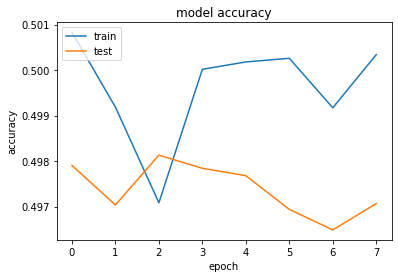

In [ ]:
from matplotlib import pyplot as plt
# summarize history for accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig("acc_16_24_uniform.png")


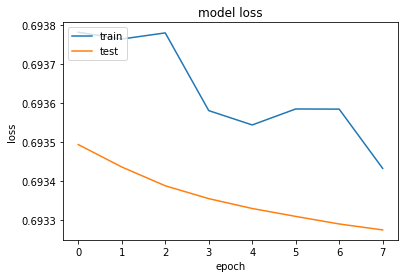

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig("loss_16_24_uniform.png")

In [ ]:
from keras.models import load_model
import h5py
model.save('all_16_24_uniform.h5')

#### Dowload saved model and graphs

In [ ]:
from google.colab import files
files.download('all_16_24_uniform.h5') 

In [ ]:
files.download("loss_16_24_uniform.png") 

In [ ]:
files.download("acc_16_24_uniform.png"' 

SyntaxError: ignored

In [ ]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(X, onehot_encoded_y)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

8000/8000 [==============================] - 0s 52us/sample - loss: 0.5522 - acc: 0.7251
Restored model, accuracy: 72.51%


In [ ]:
# Recreate the exact same model, including weights and optimizer.
new_model = keras.models.load_model('large_model_cnn.h5')
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 16, 78)            1552      
_________________________________________________________________
activation_3 (Activation)    (None, 16, 78)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 78)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 390)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                12512     
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [ ]:
loss, acc = new_model.evaluate(X, onehot_encoded_y)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

8000/8000 [==============================] - 1s 64us/sample - loss: 0.5522 - acc: 0.7251
Restored model, accuracy: 72.51%


#### Save the weights
model.save_weights('./checkpoints/my_checkpoint')

#### Restore the weights
model = create_model()
model.load_weights('./checkpoints/my_checkpoint')


#### Cross Validation


In [1]:
X = np.load('//content//gdrive//My Drive//ml_lab_project//Pickle//Cross_validation//train_x_all.npy') # ds2 =2681,ds3=69435, ds4=3926,ds5=11275, ds6=103174, ds7 =7222, ds8 =2563, ds9 = 25512
y = np.load('//content//gdrive//My Drive//ml_lab_project//Pickle//Cross_validation//train_y_all.npy')



NameError: name 'np' is not defined

In [ ]:
print(X.shape)

(77531, 4, 101)


In [ ]:
print(y.shape)

(77531, 1)


In [ ]:
y.shape[0]

In [ ]:
y.reshape(y.shape[0],1)

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_y = onehot_encoder.fit_transform(y)
onehot_encoded_y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:

#padding 0.25 on boarder of arrays
npad = ((0, 0), (0, 0), (2, 2))
X_pad = np.pad(X, pad_width=npad, mode='constant', constant_values=0.25)
print(X_pad.shape)

(77531, 4, 105)


In [ ]:
def create_and_fit_model(X_train, X_val, y_train, y_val):
      model = Sequential()
      # 1 ConvLAyer with 16 filters size 24, Zeng et al. 2016 and DeepBind 
      keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
      model.add(Conv1D(16, kernel_size = 24, data_format ="channels_first", input_shape=(4,101)))
      model.add(Activation('relu'))
      model.add(MaxPooling1D(pool_size =3, strides = 1,data_format='channels_first'))
      #Fully cnnected layer of 32 neurons
      model.add(Flatten())  
      model.add(Dense(32))
      model.add(Activation('relu'))
      #Drop out normalization of 0.5 ratio from exp design of Zeng et al. 2016 and DeepBind 
      model.add(Dropout(0.5))
      #output layer of 2 ner
      model.add(Dense(2))
      model.add(Activation('sigmoid'))
      # optimizer
      adadelta = keras.optimizers.Adadelta(learning_rate=0.05, rho=0.95)
      model.compile(loss='binary_crossentropy',
                    optimizer='adadelta',
                    metrics=['accuracy'])
      history = model.fit(X_train, y_train,
                          validation_data =(X_val, y_val),
                batch_size=100,
                epochs=8,
                callbacks=[cp_callback])
      val_acc = model.evaluate(X_val, y_val, verbose = 1)
      return model, val_acc

In [ ]:
from sklearn.model_selection import train_test_split


In [3]:
n_repeat = 5
n_folds = 3
cv_scores, model_history = list(), list()
for _ in range(n_folds):
    # split data
    X_train, X_val, y_train, y_val = train_test_split(X,  onehot_encoded_y, test_size=0.10, 
                                                      random_state = np.random.randint(1,1000, 1)[0],
                                                      stratify = onehot_encoded_y)
    # evaluate model
    model, test_acc = create_and_fit_model(X_train, X_val, y_train, y_val)
    val_acc = model.evaluate(X_val, y_val, verbose = 1)
    print(val_acc)
    cv_scores.append(val_acc)
    #model_history.append(model)
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

NameError: name 'train_test_split' is not defined

In [ ]:
print(cv_scores)

[[0.6951998820125304, 0.50283724], [0.6968637408747758, 0.49226207], [0.6946420322412802, 0.5014831]]


In [ ]:
import csv
with open('deepnn_cv_accuracies.csv', 'a+', newline='') as comparison_file:
    acc_writer = csv.writer(comparison_file, delimiter=',')
    acc_writer.writerow(cv_scores)


In [ ]:
from google.colab import files
files.download('deepnn_cv_accuracies.csv') 